In [1]:
# !pip install tensorflow
# !pip install keras
# !pip install playsound
# !pip install multiprocessing

In [2]:
# !pip install opencv-python

In [3]:


import tensorflow as tf
from tensorflow import keras

import os
os.environ['KAGGLE_USERNAME'] = "nidamanurisaiadarsh"
os.environ['KAGGLE_KEY'] = "be6ca3bc2dd7bf970efd0e0c39996073"



# !kaggle datasets download prasadvpatil/mrl-dataset

# !unzip alien-vs-predator-images.zip



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2



In [4]:
# !unzip mrl-dataset.zip

In [5]:


class_names = ["Closed_Eyes","Open_Eyes"]
class_names_label = {class_name:i for i,class_name in enumerate(class_names)}
nb_classes = len(class_names)
print(class_names_label)

IMAGE_SIZE=(40,40)

def load_data():
  directory = "./mrl-dataset"
  category=["train"]
  output=[]

  for cg in category:
    path = os.path.join(directory,cg)
    print(path)
    images = []
    labels = []
    print("Loading {}".format(cg))

    for folder in os.listdir(path):
      label = class_names_label[folder]
      for file in os.listdir(os.path.join(path,folder)):
        img_path = os.path.join(os.path.join(path,folder),file)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image,IMAGE_SIZE)
        image = image/255

        images.append(image)
        labels.append(label)
    images = np.array(images,dtype='float32')
    labels = np.array(labels,dtype='int32')

    output.append((images,labels))
  return output

{'Closed_Eyes': 0, 'Open_Eyes': 1}


In [6]:
df = load_data()

./mrl-dataset\train
Loading train


In [7]:
df

[(array([[[0.15686275, 0.18431373, 0.18431373, ..., 0.35686275,
           0.35686275, 0.3529412 ],
          [0.14901961, 0.18039216, 0.1882353 , ..., 0.36078432,
           0.38039216, 0.3647059 ],
          [0.16078432, 0.18431373, 0.1882353 , ..., 0.37254903,
           0.36862746, 0.36862746],
          ...,
          [0.21568628, 0.23529412, 0.24705882, ..., 0.3019608 ,
           0.30588236, 0.32156864],
          [0.21176471, 0.23137255, 0.2509804 , ..., 0.3019608 ,
           0.3137255 , 0.3137255 ],
          [0.2       , 0.23137255, 0.2509804 , ..., 0.30588236,
           0.31764707, 0.31764707]],
  
         [[0.34901962, 0.34901962, 0.34509805, ..., 0.21568628,
           0.2       , 0.19607843],
          [0.34509805, 0.3529412 , 0.3647059 , ..., 0.21176471,
           0.20784314, 0.19607843],
          [0.3647059 , 0.3647059 , 0.36078432, ..., 0.21176471,
           0.20392157, 0.19607843],
          ...,
          [0.25882354, 0.25882354, 0.2627451 , ..., 0.27058825,
  

In [8]:
len(df)

1

In [9]:
len(df[0])

2

In [10]:
labels = df[0][1]

In [11]:
data = df[0][0]
data = np.array(data)

In [12]:
data.shape

(4000, 40, 40)

In [13]:
labels = np.array(labels)

In [14]:
labels.shape

(4000,)

In [15]:
def pre(data1):
  data1 = data1.reshape(40,40,1)
  return data1
train = np.array(list(map(pre,data)))

In [16]:
train

array([[[[0.15686275],
         [0.18431373],
         [0.18431373],
         ...,
         [0.35686275],
         [0.35686275],
         [0.3529412 ]],

        [[0.14901961],
         [0.18039216],
         [0.1882353 ],
         ...,
         [0.36078432],
         [0.38039216],
         [0.3647059 ]],

        [[0.16078432],
         [0.18431373],
         [0.1882353 ],
         ...,
         [0.37254903],
         [0.36862746],
         [0.36862746]],

        ...,

        [[0.21568628],
         [0.23529412],
         [0.24705882],
         ...,
         [0.3019608 ],
         [0.30588236],
         [0.32156864]],

        [[0.21176471],
         [0.23137255],
         [0.2509804 ],
         ...,
         [0.3019608 ],
         [0.3137255 ],
         [0.3137255 ]],

        [[0.2       ],
         [0.23137255],
         [0.2509804 ],
         ...,
         [0.30588236],
         [0.31764707],
         [0.31764707]]],


       [[[0.34901962],
         [0.34901962],
         [0.34

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train,x_test,labels,labels_test = train_test_split(train,labels,test_size = 0.3,stratify=labels)

In [19]:
import keras


data_aug = keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(40,40,1)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(40,40,1)),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(40,40,1)),
    tf.keras.layers.experimental.preprocessing.RandomContrast(0.1),

#     # keras.layers.Conv2D(filters=32,kernel_size=(2,2),activation="relu",input_shape=(64,64,3)),
#     # keras.layers.MaxPooling2D((2,2)),

#     # keras.layers.Conv2D(filters=64,kernel_size=(2,2),activation="relu"),
#     # keras.layers.MaxPooling2D((2,2)),

#     # keras.layers.Conv2D(filters=128,kernel_size=(2,2),activation="relu"),
#     # keras.layers.MaxPooling2D((2,2)),

    

#     # keras.layers.Flatten(),
#     # keras.layers.Dense(64,activation="relu"),
#     # keras.layers.Dense(2,activation="sigmoid")
    
])

cnn = keras.Sequential([
    data_aug,
    keras.layers.Conv2D(filters=40,kernel_size=(2,2),padding='same',activation="relu"),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters=128,kernel_size=(2,2),padding='same',activation="relu"),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters=256,kernel_size=(2,2),padding='same',activation="relu"),
    keras.layers.MaxPooling2D((2,2)),

    

    keras.layers.Flatten(),
    keras.layers.Dense(40,activation="relu"),
    keras.layers.Dense(2,activation="sigmoid")

])
cnn.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

cnn.fit(train,labels,epochs=7)



Epoch 1/7
88/88 [==============================] - 17s 70ms/step - loss: 0.4389 - accuracy: 0.7621
Epoch 2/7
88/88 [==============================] - 6s 70ms/step - loss: 0.1040 - accuracy: 0.9621
Epoch 3/7
88/88 [==============================] - 6s 69ms/step - loss: 0.0580 - accuracy: 0.9829
Epoch 4/7


88/88 [==============================] - 6s 71ms/step - loss: 0.0431 - accuracy: 0.9843
Epoch 5/7
88/88 [==============================] - 6s 70ms/step - loss: 0.0330 - accuracy: 0.9900
Epoch 6/7
88/88 [==============================] - 6s 72ms/step - loss: 0.0361 - accuracy: 0.9879
Epoch 7/7
88/88 [==============================] - 6s 72ms/step - loss: 0.0290 - accuracy: 0.9932


In [20]:
def check(i):
    if i==0:
        return 'Closed_eyes'
    else:
        return 'Opened_eyes'

In [21]:
import cv2
import numpy as np

# vedio=cv2.VideoCapture(0)


In [22]:
cnn.evaluate(x_test,labels_test)

38/38 [==============================] - 1s 16ms/step - loss: 0.0432 - accuracy: 0.9867


[0.04324965178966522, 0.9866666793823242]

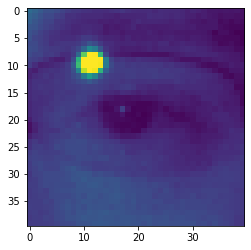

In [23]:
plt.imshow(train[600].reshape(40,40))

In [24]:
predictions = cnn.predict(train)

88/88 [==============================] - 2s 15ms/step


In [25]:
check(np.argmax(predictions[600]))

'Opened_eyes'

In [26]:
import cv2
import multiprocessing
import winsound
from playsound import playsound
p = multiprocessing.Process(target=playsound, args=("siren.wav",))
# from google.colab.patches import cv2_imshow
font=cv2.FONT_HERSHEY_SIMPLEX
# from google.colab.patches import cv2_imshow
# Load the cascade
# face_detector=cv2.CascadeClassifier('face.xml')
face_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
# To capture video stream from webcam. 
cap = cv2.VideoCapture(0)
# vedio.set(3,720)
# vedio.set(4,720)
# vedio.set(10,180)
# To use a video file as input 
# cap = cv2.VideoCapture('test.mp4')
L=[]
L1=[]
count=0
val = 0
while True:
    
    # Read the frame
    _, img = cap.read()
    img1 = np.asarray(img)
    
    # src,img=vedio.read()
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect the faces
    faces = face_cascade.detectMultiScale(img, 1.1, 4)
    cv2.putText(img,'prediction : ',(40,20),font,0.9,(100,50,150),4)
#     cv2.putText(img,'probability : ',(40,80),font,0.9,(101,51,151),4)
    # Draw the rectangle around each face
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        gray=img[y:y+h+1,x:x+w+1]
        gray=cv2.cvtColor(gray,cv2.COLOR_BGR2GRAY)
        gray=gray/255
        gray=cv2.resize(gray,(40,40))
        gray=gray.reshape(1,40,40,1)
        prediction=cnn.predict(gray)
        probability=np.amax(prediction)
        index=np.argmax(cnn.predict(gray))
        if index==0:
            L.append(index)
        else:
            L1.append(index)
    print(L)
    print(L1)
    if len(L)>len(L1):
        count=count+1
        if count>8:
            if val!=1:
                val=1
                winsound.Beep(5000, 1000)
                val=0
        elif count>4:
            if val!=1:
                val=1
                winsound.Beep(2000, 1000)
                val=0
        elif count>2:
            if val!=1:
                val=1
                winsound.Beep(1000, 1000)
                val=0
                
    #             playsound('siren.wav')
#                 p.start()
        else:
            if val==1:
#                 p.terminate()
                val=0
        cv2.putText(img, '  ' + str(0) + '  ' + str("Sleeping") , (240,20),font  , 0.9 , (250,150,50) , 4)
        L=[]
        L1=[]
    else:
        count=0
#         p.terminate()
        cv2.putText(img, '  ' + str(1) + '  ' + str("Awake") , (240,20),font  , 0.9 , (250,150,50) , 4)
        L=[]
        L1=[]
#         if probability>=0.75:
#             cv2.putText(img, '  ' + str(index) + '  ' + str(check(index)) , (240,20),font  , 0.9 , (250,150,50) , 4)
#             cv2.putText(img, '  ' + str(round(probability*100,2)) , (220,80),font , 0.9 , (150,250,50) , 4)
        
    # Display
    
    cv2.imshow('img',img)
    cv2.waitKey(1) 
    if cv2.waitKey(1)==ord("x"):
        cv2.destroyAllWindows()
        break  
#     # Stop if escape key is pressed
#     k = cv2.waitKey(30) & 0xff
#     if k==27:
#         break
# # Release the VideoCapture object
# cap.release()

1/1 [==============================] - 0s 32ms/step
[]
[1, 1]
1/1 [==============================] - 0s 37ms/step
[]
[1, 1]
1/1 [==============================] - 0s 38ms/step
[]
[1, 1]
1/1 [==============================] - 0s 56ms/step
[]
[1, 1]
1/1 [==============================] - 0s 32ms/step
[]
[1, 1]
1/1 [==============================] - 0s 30ms/step
[]
[1, 1]
1/1 [==============================] - 0s 30ms/step
[]
[1, 1]
1/1 [==============================] - 0s 31ms/step
[]
[1, 1]
1/1 [==============================] - 0s 30ms/step
[]
[1, 1]
1/1 [==============================] - 0s 29ms/step
[0]
[1, 1]
1/1 [==============================] - 0s 31ms/step
[0]
[1, 1]
1/1 [==============================] - 0s 28ms/step
[]
[1, 1]
1/1 [==============================] - 0s 28ms/step
[]
[1, 1]
1/1 [==============================] - 0s 29ms/step
[]
[1]
1/1 [==============================] - 0s 30ms/step
[]
[1, 1]
1/1 [==============================] - 0s 28ms/step
[]
[1, 1]
[]
[]
[]


1/1 [==============================] - 0s 35ms/step
[]
[1, 1]
1/1 [==============================] - 0s 37ms/step
[]
[1, 1]
1/1 [==============================] - 0s 35ms/step
[]
[1, 1]
1/1 [==============================] - 0s 30ms/step
[]
[1, 1]
1/1 [==============================] - 0s 31ms/step
[]
[1, 1]
1/1 [==============================] - 0s 30ms/step
[]
[1, 1]
1/1 [==============================] - 0s 30ms/step
[]
[1, 1]
1/1 [==============================] - 0s 32ms/step
[0]
[1, 1]
1/1 [==============================] - 0s 29ms/step
[]
[1, 1]
1/1 [==============================] - 0s 31ms/step
[0]
[1]
1/1 [==============================] - 0s 29ms/step
[0]
[]
[]
[]
[]
[]
1/1 [==============================] - 0s 30ms/step
[0]
[]
1/1 [==============================] - 0s 31ms/step
[]
[1]
1/1 [==============================] - 0s 31ms/step
[]
[1, 1]
1/1 [==============================] - 0s 31ms/step
[]
[1]
1/1 [==============================] - 0s 32ms/step
[]
[1]
1/1 [=======

1/1 [==============================] - 0s 29ms/step
[0]
[]
1/1 [==============================] - 0s 31ms/step
[0]
[]
[]
[]
1/1 [==============================] - 0s 29ms/step
[0]
[]
[]
[]
[]
[]
[]
[]
1/1 [==============================] - 0s 31ms/step
[]
[1]
1/1 [==============================] - 0s 31ms/step
[0, 0]
[]
[]
[]
1/1 [==============================] - 0s 29ms/step
[0]
[]
1/1 [==============================] - 0s 36ms/step
[0]
[]
1/1 [==============================] - 0s 31ms/step
[0, 0]
[]
1/1 [==============================] - 0s 30ms/step
[0]
[]
1/1 [==============================] - 0s 29ms/step
[0, 0]
[]
1/1 [==============================] - 0s 34ms/step
[0]
[]
1/1 [==============================] - 0s 29ms/step
[0, 0]
[]
1/1 [==============================] - 0s 31ms/step
[0]
[1, 1]
1/1 [==============================] - 0s 38ms/step
[]
[1, 1]
1/1 [==============================] - 0s 30ms/step
[]
[1, 1]
1/1 [==============================] - 0s 28ms/step
[]
[1, 1]
1

1/1 [==============================] - 0s 33ms/step
[]
[1, 1, 1]
1/1 [==============================] - 0s 35ms/step
[0, 0]
[1]
1/1 [==============================] - 0s 29ms/step
[0]
[1, 1]
1/1 [==============================] - 0s 31ms/step
[0]
[1, 1]
1/1 [==============================] - 0s 34ms/step
[0]
[1, 1]
1/1 [==============================] - 0s 29ms/step
[0, 0]
[1, 1]
1/1 [==============================] - 0s 31ms/step
[0, 0]
[]
1/1 [==============================] - 0s 32ms/step
[0, 0]
[]
1/1 [==============================] - 0s 30ms/step
[0, 0]
[]
1/1 [==============================] - 0s 29ms/step
[0, 0]
[]
1/1 [==============================] - 0s 29ms/step
[0]
[]
1/1 [==============================] - 0s 30ms/step
[0]
[]
1/1 [==============================] - 0s 35ms/step
[0]
[]
1/1 [==============================] - 0s 29ms/step
[]
[1, 1]
[]
[]
1/1 [==============================] - 0s 32ms/step
[0, 0]
[]
1/1 [==============================] - 0s 32ms/step
[0, 0, 0]


1/1 [==============================] - 0s 31ms/step
[0, 0]
[]
1/1 [==============================] - 0s 30ms/step
[0]
[]
1/1 [==============================] - 0s 29ms/step
[0]
[]
1/1 [==============================] - 0s 31ms/step
[0, 0]
[]
1/1 [==============================] - 0s 36ms/step
[0]
[]
1/1 [==============================] - 0s 32ms/step
[0]
[1]
1/1 [==============================] - 0s 29ms/step
[0, 0, 0]
[]
[]
[]
[]
[]
[]
[]
[]
[]
1/1 [==============================] - 0s 28ms/step
[0]
[1]
1/1 [==============================] - 0s 32ms/step
[0]
[]
1/1 [==============================] - 0s 34ms/step
[]
[1, 1]
1/1 [==============================] - 0s 36ms/step
[]
[1, 1]
1/1 [==============================] - 0s 30ms/step
[]
[1, 1, 1]
1/1 [==============================] - 0s 30ms/step
[]
[1, 1, 1]
1/1 [==============================] - 0s 29ms/step
[0]
[1, 1, 1]
1/1 [==============================] - 0s 30ms/step
[0]
[1, 1, 1]
1/1 [==============================] - 0s 29m

1/1 [==============================] - 0s 30ms/step
[]
[1]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
1/1 [==============================] - 0s 31ms/step
[0]
[]
1/1 [==============================] - 0s 29ms/step
[0]
[]
1/1 [==============================] - 0s 30ms/step
[0]
[]
1/1 [==============================] - 0s 32ms/step
[]
[1]
1/1 [==============================] - 0s 30ms/step
[]
[1]
1/1 [==============================] - 0s 31ms/step
[]
[1, 1]
1/1 [==============================] - 0s 30ms/step
[]
[1, 1]
1/1 [==============================] - 0s 31ms/step
[]
[1, 1]
1/1 [==============================] - 0s 38ms/step
[]
[1]
1/1 [==============================] - 0s 30ms/step
[0, 0]
[]
1/1 [==============================] - 0s 30ms/step
[0]
[]
1/1 [==============================] - 0s 41ms/step
[0, 0]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]

1/1 [==============================] - 0s 37ms/step
[]
[1, 1]
1/1 [==============================] - 0s 31ms/step
[0]
[1]
1/1 [==============================] - 0s 29ms/step
[0]
[1]
1/1 [==============================] - 0s 31ms/step
[0]
[1]
1/1 [==============================] - 0s 31ms/step
[]
[1, 1]
1/1 [==============================] - 0s 32ms/step
[]
[1, 1]
1/1 [==============================] - 0s 32ms/step
[]
[1, 1]
1/1 [==============================] - 0s 35ms/step
[]
[1, 1]
1/1 [==============================] - 0s 28ms/step
[]
[1, 1]
1/1 [==============================] - 0s 36ms/step


KeyboardInterrupt: 